<a href="https://colab.research.google.com/github/Kshitijasharma/celebal_internship/blob/main/data_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
import seaborn as sns
import matplotlib.pyplot as plt


LOAD DATASET

In [6]:
titanic_df = pd.read_csv('titanic_final.csv')

# Display the first few rows of the dataset
titanic_df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


DATA CLEANING

In [8]:
# problem with this method is we are removing all the rows containing null values, what if some data also gets erased.
'''
#check for missing values
print("Missing values before cleaning:")
print(titanic_df.isnull().sum())

# Drop rows with missing values
titanic_df = titanic_df.dropna()

# Check for missing values after cleaning
print("\nMissing values after cleaning:")
print(titanic_df.isnull().sum())
'''
# Fill missing Age values with the median
titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace=True)

# Fill missing Embarked values with the most frequent value (mode)
titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0], inplace=True)

# Drop the Cabin column as it has too many missing values
titanic_df.drop(columns=['Cabin'], inplace=True)

# Drop any remaining rows with missing values
titanic_df.dropna(inplace=True)

# Display the cleaned dataset
print("Dataset After Cleaning:")
print(titanic_df.head())
print(titanic_df.isnull().sum())


Dataset After Cleaning:
    PassengerId  Survived  Pclass  \
1             2         1       1   
3             4         1       1   
6             7         0       1   
10           11         1       3   
11           12         1       1   

                                                 Name     Sex   Age  SibSp  \
1   Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
3        Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
6                             McCarthy, Mr. Timothy J    male  54.0      0   
10                    Sandstrom, Miss. Marguerite Rut  female   4.0      1   
11                           Bonnell, Miss. Elizabeth  female  58.0      0   

    Parch    Ticket     Fare Embarked  
1       0  PC 17599  71.2833        C  
3       0    113803  53.1000        S  
6       0     17463  51.8625        S  
10      1   PP 9549  16.7000        S  
11      0    113783  26.5500        S  
PassengerId    0
Survived       0
Pclass    

Age, Cabin and Embarked has alots of null/missing values.

Transformation and Encoding

In [9]:
# One-Hot encode categorical features
categorical_features = ['Sex', 'Embarked']
titanic_df = pd.get_dummies(titanic_df, columns=categorical_features)

# Display the dataset after encoding
print("Dataset After Encoding Categorical Variables:")
print(titanic_df.head())


Dataset After Encoding Categorical Variables:
    PassengerId  Survived  Pclass  \
1             2         1       1   
3             4         1       1   
6             7         0       1   
10           11         1       3   
11           12         1       1   

                                                 Name   Age  SibSp  Parch  \
1   Cumings, Mrs. John Bradley (Florence Briggs Th...  38.0      1      0   
3        Futrelle, Mrs. Jacques Heath (Lily May Peel)  35.0      1      0   
6                             McCarthy, Mr. Timothy J  54.0      0      0   
10                    Sandstrom, Miss. Marguerite Rut   4.0      1      1   
11                           Bonnell, Miss. Elizabeth  58.0      0      0   

      Ticket     Fare  Sex_female  Sex_male  Embarked_C  Embarked_Q  \
1   PC 17599  71.2833        True     False        True       False   
3     113803  53.1000        True     False       False       False   
6      17463  51.8625       False      True       False

Feature Engineering

In [10]:
# Create a new feature 'FamilySize' as a combination of SibSp and Parch
titanic_df['FamilySize'] = titanic_df['SibSp'] + titanic_df['Parch']

# Create a new feature 'IsAlone' - Single passenger or not
titanic_df['IsAlone'] = (titanic_df['FamilySize'] == 0).astype(int)

# Drop unnecessary columns
titanic_df.drop(columns=['Name', 'Ticket', 'SibSp', 'Parch', 'PassengerId'], inplace=True)

# Display the dataset after feature engineering
print("Dataset After Feature Engineering:")
print(titanic_df.head())


Dataset After Feature Engineering:
    Survived  Pclass   Age     Fare  Sex_female  Sex_male  Embarked_C  \
1          1       1  38.0  71.2833        True     False        True   
3          1       1  35.0  53.1000        True     False       False   
6          0       1  54.0  51.8625       False      True       False   
10         1       3   4.0  16.7000        True     False       False   
11         1       1  58.0  26.5500        True     False       False   

    Embarked_Q  Embarked_S  FamilySize  IsAlone  
1        False       False           1        0  
3        False        True           1        0  
6        False        True           0        1  
10       False        True           2        0  
11       False        True           0        1  


Split the Data

In [11]:
# Define features (X) and target (y)
X = titanic_df.drop(columns=['Survived'])
y = titanic_df['Survived']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print("Training Set Shape:", X_train.shape)
print("Testing Set Shape:", X_test.shape)


Training Set Shape: (146, 10)
Testing Set Shape: (37, 10)


Normalize/Scale the Data

In [12]:
# Apply StandardScaler to the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Alternatively, you can use MinMaxScaler
# scaler = MinMaxScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# Create a DataFrame from the scaled data
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X.columns)

# Display the first few rows of the scaled training set
print("Scaled Training Set:")
print(X_train_scaled_df.head())


Scaled Training Set:
     Pclass       Age      Fare  Sex_female  Sex_male  Embarked_C  Embarked_Q  \
0 -0.372837  0.637500 -0.631862   -0.959715  0.959715   -0.689019   -0.117851   
1 -0.372837 -0.436818 -0.149452   -0.959715  0.959715   -0.689019   -0.117851   
2  1.571240 -2.129682 -0.663517   -0.959715  0.959715   -0.689019   -0.117851   
3  3.515316 -0.697258 -0.895858   -0.959715  0.959715   -0.689019   -0.117851   
4 -0.372837  0.084063 -0.327296   -0.959715  0.959715   -0.689019   -0.117851   

   Embarked_S  FamilySize   IsAlone  
0    0.710742   -0.842969  1.147807  
1    0.710742    0.048868 -0.871227  
2    0.710742    0.940705 -0.871227  
3    0.710742   -0.842969  1.147807  
4    0.710742    0.940705 -0.871227  


Data Visualization

Survival rate by GENDER.

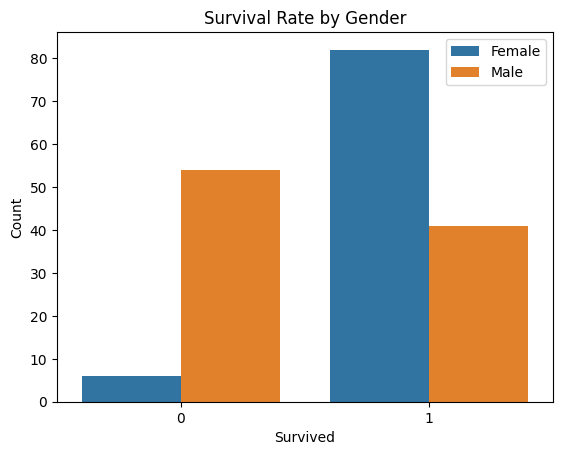

In [15]:
sns.countplot(x='Survived', hue='Sex_male', data=titanic_df)
plt.title('Survival Rate by Gender')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.legend(['Female', 'Male'])
plt.show()


Survival Rate by Class

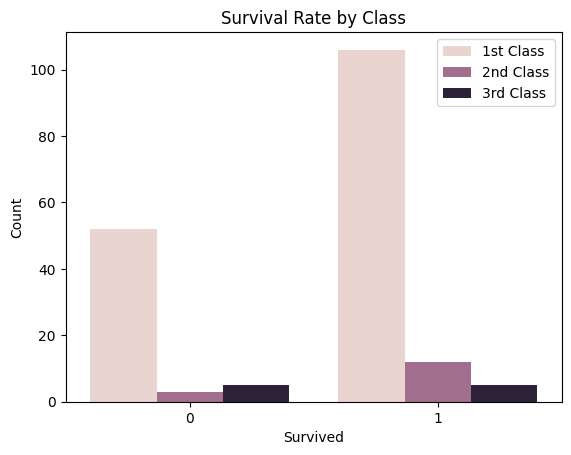

In [16]:
sns.countplot(x='Survived', hue='Pclass', data=titanic_df)
plt.title('Survival Rate by Class')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.legend(['1st Class', '2nd Class', '3rd Class'])
plt.show()


Age distribution

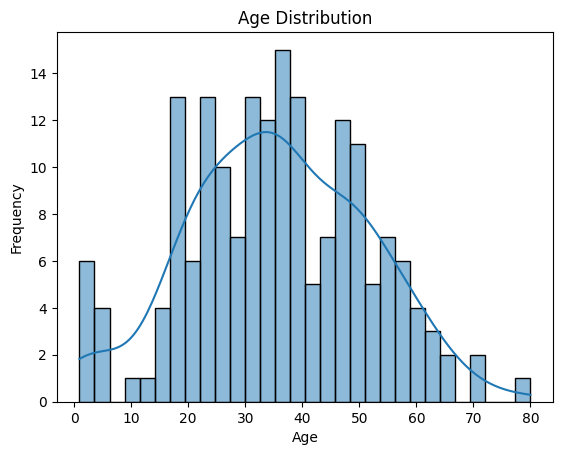

In [17]:
sns.histplot(titanic_df['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()